# ÏòàÏ†ú Îç∞Ïù¥ÌÑ∞Î°ú Ïïî ÏßÑÎã® Î∂ÑÎ•òÌïòÍ∏∞

# 1.ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #Ï°çÍ∑úÌôî
from sklearn.linear_model import LogisticRegression #Î∂ÑÎ•òÎ™®Îç∏Ïù∏Îç∞, ÌöåÍ∑ÄÏù∏ ÎìØ ÌïòÎäî?

from sklearn.metrics import accuracy_score , confusion_matrix , classification_report


# 2.ÏòàÏãú Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

In [38]:
np.random.seed(42)
data_size = 300  #Ìñâ Ïàò
features = 10 #Î≥ÄÏàò

# randn() : Ï†ïÍ∑úÎ∂ÑÌè¨(ÌèâÍ∑†0, ÌëúÏ§ÄÌé∏Ï∞®1) ÏïàÏóêÏÑú 0,1 ÏÇ¨Ïù¥ ÎÇúÏàò ÏÉùÏÑ±, ()ÏïàÏóêÎäî shape
X = np.random.randn(data_size,features) #300, 10
y = (np.random.randn(data_size) > 0.5).astype(int)

#ÏúÑÏóêÏÑú ÏÉùÏÑ±Îêú numpy arrayÎ•º Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÍ≤Ω ÏòàÏ†ï, featureÏóê Ïù¥Î¶Ñ Î∂ÄÏó¨
columns = [f"feature{i}" for i in range(features)] # features 10Í∞úÏóê Ìï¥ÎãπÌïòÎäî ÎßåÌÅº, 0~9

In [39]:
columns

['feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6',
 'feature7',
 'feature8',
 'feature9']

In [40]:
#pd.DataFrame(X,y)
df = pd.DataFrame(X, columns=columns)
df.head()

feature0  feature1  feature2  feature3  feature4  feature5  feature6  \
0  0.496714 -0.138264  0.647689  1.523030 -0.234153 -0.234137  1.579213   
1 -0.463418 -0.465730  0.241962 -1.913280 -1.724918 -0.562288 -1.012831   
2  1.465649 -0.225776  0.067528 -1.424748 -0.544383  0.110923 -1.150994   
3 -0.601707  1.852278 -0.013497 -1.057711  0.822545 -1.220844  0.208864   
4  0.738467  0.171368 -0.115648 -0.301104 -1.478522 -0.719844 -0.460639   

   feature7  feature8  feature9  
0  0.767435 -0.469474  0.542560  
1  0.314247 -0.908024 -1.412304  
2  0.375698 -0.600639 -0.291694  
3 -1.959670 -1.328186  0.196861  
4  1.057122  0.343618 -1.763040

In [41]:
df['label'] = y

In [42]:
df.head()

feature0  feature1  feature2  feature3  feature4  feature5  feature6  \
0  0.496714 -0.138264  0.647689  1.523030 -0.234153 -0.234137  1.579213   
1 -0.463418 -0.465730  0.241962 -1.913280 -1.724918 -0.562288 -1.012831   
2  1.465649 -0.225776  0.067528 -1.424748 -0.544383  0.110923 -1.150994   
3 -0.601707  1.852278 -0.013497 -1.057711  0.822545 -1.220844  0.208864   
4  0.738467  0.171368 -0.115648 -0.301104 -1.478522 -0.719844 -0.460639   

   feature7  feature8  feature9  label  
0  0.767435 -0.469474  0.542560      0  
1  0.314247 -0.908024 -1.412304      0  
2  0.375698 -0.600639 -0.291694      0  
3 -1.959670 -1.328186  0.196861      1  
4  1.057122  0.343618 -1.763040      1

In [72]:
# @title feature0 vs feature1

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='feature0', y='feature1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# 3.Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
Î™®Îç∏Ïóê Îì§Ïñ¥Í∞à Ïàò ÏûàÎäî ÌòïÌÉúÎ°ú Î∞îÍøîÏ§å

X_train, X_test, y_train, y_test

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (240, 10)
X_test shape :  (60, 10)
y_train shape :  (240,)
y_test shape :  (60,)


## 1. Ï†ïÍ∑úÌôî(Normalization):
- Ïó≠Ìï†: Îç∞Ïù¥ÌÑ∞Ïùò Ïä§ÏºÄÏùºÏùÑ Ï°∞Ï†ïÌïòÏó¨ Í∞Å ÌäπÏßï(feature)Ïù¥ Í∞ôÏùÄ Î≤îÏúÑÎ•º Í∞ÄÏßÄÎèÑÎ°ù ÌïòÎäî Í≤ÉÏûÖÎãàÎã§. Ï£ºÎ°ú 0Í≥º 1 ÏÇ¨Ïù¥Î°ú Ï°∞Ï†ïÌï©ÎãàÎã§.
- Ïù¥Ïú†: Ï†ïÍ∑úÌôîÎäî Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ïÍ≥º Í∞ôÏùÄ ÏµúÏ†ÅÌôî ÏïåÍ≥†Î¶¨Ï¶òÏùò ÏàòÎ†¥ ÏÜçÎèÑÎ•º ÎÜíÏù¥Í≥†, ÌäπÏ†ï ÌäπÏßïÏù¥ Îã§Î•∏ ÌäπÏßïÎ≥¥Îã§ ÏßÄÎÇòÏπòÍ≤å ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌï©ÎãàÎã§.
- Î∞©Î≤ï: ÏùºÎ∞òÏ†ÅÏúºÎ°ú Min-Max Ï†ïÍ∑úÌôîÎÇò ÌëúÏ§ÄÌôî(Z-Score)Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    1. Min-Max Ï†ïÍ∑úÌôî: Í∞Å Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Ïùò Í∞íÏùÑ 0Í≥º 1 ÏÇ¨Ïù¥Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.

image.png

    2. ÌëúÏ§ÄÌôî(Z-Score): Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Î•º ÌèâÍ∑†Ïù¥ 0Ïù¥Í≥† ÌëúÏ§Ä Ìé∏Ï∞®Í∞Ä 1Ïù¥ ÎêòÎèÑÎ°ù Î≥ÄÌôòÌï©ÎãàÎã§

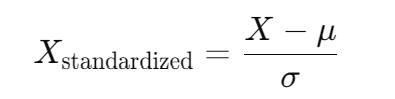

    - Ïó¨Í∏∞ÏÑú ùúáÎäî ÌèâÍ∑†,  Îäî ÌëúÏ§Ä Ìé∏Ï∞®ÏûÖÎãàÎã§.

## 2. fit Ìï¥Ï§ÄÎã§Îäî Í≤É:
- Ïó≠Ìï†: Î™®Îç∏Ïù¥ Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÏ∂∞ÏßÄÎèÑÎ°ù Îß§Í∞úÎ≥ÄÏàòÎ•º Ï°∞Ï†ïÌïòÎäî Í≥ºÏ†ïÏûÖÎãàÎã§.
- Í≥ºÏ†ï:
    - Î™®Îç∏Ïóê Îç∞Ïù¥ÌÑ∞Î•º ÏûÖÎ†•ÌïòÏó¨ ÏÜêÏã§ Ìï®ÏàòÏùò Í∞íÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    - ÏÜêÏã§ Ìï®ÏàòÎ•º ÏµúÏÜåÌôîÌïòÎèÑÎ°ù Î™®Îç∏Ïùò Îß§Í∞úÎ≥ÄÏàòÎ•º Ï°∞Ï†ïÌï©ÎãàÎã§.
    - Ïù¥ Í≥ºÏ†ïÏùÑ Ïó¨Îü¨ Î≤à Î∞òÎ≥µÌïòÏó¨ ÏµúÏ†ÅÏùò Îß§Í∞úÎ≥ÄÏàòÎ•º Ï∞æÏäµÎãàÎã§.

[Ï†ïÎ¶¨]
- Ï†ïÍ∑úÌôî: Îç∞Ïù¥ÌÑ∞Ïùò Î≤îÏúÑÎ•º Ï°∞Ï†ïÌïòÏó¨ ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú Ìö®Ïú®Ï†ÅÏúºÎ°ú ÏÇ¨Ïö©ÎêòÎèÑÎ°ù ÌïòÎäî Í≥ºÏ†ïÏûÖÎãàÎã§.
- fit: Î™®Îç∏Ïù¥ Ï£ºÏñ¥ÏßÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º ÌÜµÌï¥ Îß§Í∞úÎ≥ÄÏàòÎ•º ÏµúÏ†ÅÌôîÌïòÎäî Í≥ºÏ†ïÏûÖÎãàÎã§. Ïù¥Î•º ÌÜµÌï¥ Î™®Îç∏ÏùÄ ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÉÄÍ≤ü Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º ÌïôÏäµÌïòÍ≥† ÏòàÏ∏° Îä•Î†•ÏùÑ Í∞ñÏ∂îÍ≤å Îê©ÎãàÎã§.

In [45]:
# Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî
scaler = StandardScaler()
# ÌïôÏäµ, Î≥ÄÌôò ÌõÑ Ï†ïÍ∑úÌôî
X_train_scaled = scaler.fit_transform(X_train) # fit_transform: ÌïôÏäµÍ≥º Î≥ÄÌôò ÎèôÏãúÏóê

In [46]:
X_train[0]

array([ 0.16057398,  0.00304602,  0.43693817,  1.19064627,  0.94955414,
       -1.48489797, -2.55392113,  0.93431991, -1.3668787 , -0.2247654 ])

In [47]:
#X_train_scaled[:10]
X_train_scaled[0]

array([ 0.12704631, -0.08247099,  0.48683579,  1.21427839,  0.78326148,
       -1.45737458, -2.50413138,  0.90724522, -1.52258614, -0.3807814 ])

In [48]:
X_test_scaled = scaler.transform(X_test)

# 4.Î∂ÑÎ•ò Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ

In [49]:
model = LogisticRegression() #ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïóê ÏûàÎäî Ìï®Ïàò

In [50]:
type(model)

sklearn.linear_model._logistic.LogisticRegression

In [51]:
# Î™®Îç∏ÌïôÏäµ
# model.fit(X,y)
model.fit(X_train_scaled, y_train)

LogisticRegression()

# 5.Î∂ÑÎ•ò Í≤∞Í≥º ÏòàÏ∏° Î∞è ÌèâÍ∞Ä

In [52]:
# ÏòàÏ∏°
y_pred = model.predict(X_test_scaled)

In [53]:
y_pred.shape

(60,)

In [54]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
# Ï†ïÌôïÎèÑ(Accuracy) Ï≤¥ÌÅ¨
# ÎßûÏùÄ Í≤ÉÏùò Í∞ØÏàò y <-> y_pred
# accuracy_score , confusion_matrix , classification_report

accuracy = accuracy_score(y_test, y_pred)

In [56]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [57]:
# print(classification_report(y_test, y_pred))
class_report = print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        40
           1       0.00      0.00      0.00        20

    accuracy                           0.67        60
   macro avg       0.33      0.50      0.40        60
weighted avg       0.44      0.67      0.53        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
print("accuracy:", accuracy)
print("[Confusion Matrix]")
print(conf_matrix)
print("-"* 100)
print("[classification Report]")
print(class_report)

accuracy: 0.6666666666666666
[Confusion Matrix]
[[40  0]
 [20  0]]
----------------------------------------------------------------------------------------------------
[classification Report]
None


# 6.Í≤∞Í≥º ÏãúÍ∞ÅÌôî

In [69]:
# X_test
# X_test[:, 0] # Ï≤´Î≤àÏß∏ feature
# X_test[:, 1] # ÎëêÎ≤àÏß∏ feature
X_test[:, 0], X_test[:, 1]

(array([ 5.27958857e-04,  9.64851633e-01,  7.91031947e-01, -1.25040773e+00,
        -1.84618786e+00, -1.53098492e-02,  1.05194762e+00,  8.50897962e-01,
        -1.66940528e+00, -3.48652134e-01, -4.55122453e-02,  2.50492850e-01,
        -1.28537511e-01, -6.05860821e-01,  2.31465857e+00, -1.84087423e+00,
         3.86808521e-01,  3.68673309e-01,  1.73889966e+00,  2.42194567e-02,
         6.96954405e-01, -2.57376537e-01, -3.79127741e-01,  3.88578605e-01,
        -3.58340152e-01, -2.49940571e+00,  3.08050540e-01, -5.31214295e-01,
         6.98828420e-01,  1.20599452e+00,  1.07363175e+00, -5.73662007e-01,
        -2.19671888e-01, -1.18759842e+00, -1.59812435e+00,  7.78361076e-01,
         1.63996453e+00, -1.31256967e-01,  1.51639406e+00,  3.24083969e-01,
        -6.84629826e-01,  8.20482181e-01, -1.86871644e-01, -8.22220396e-01,
         8.65897875e-02,  4.59972143e-01, -1.02937151e+00, -3.35784699e-01,
         3.61395606e-01, -6.26790973e-02,  1.95845255e-01,  4.38475739e-01,
        -2.2

In [75]:
# 1, 2Î≤à ÌäπÏÑ±Ïóê ÎåÄÌï¥ÏÑú ÏãúÍ∞ÅÌôî
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='o', label='Actual')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='x', label='Predict')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.title('Cancer Diagnosis Classification')
plt.show()